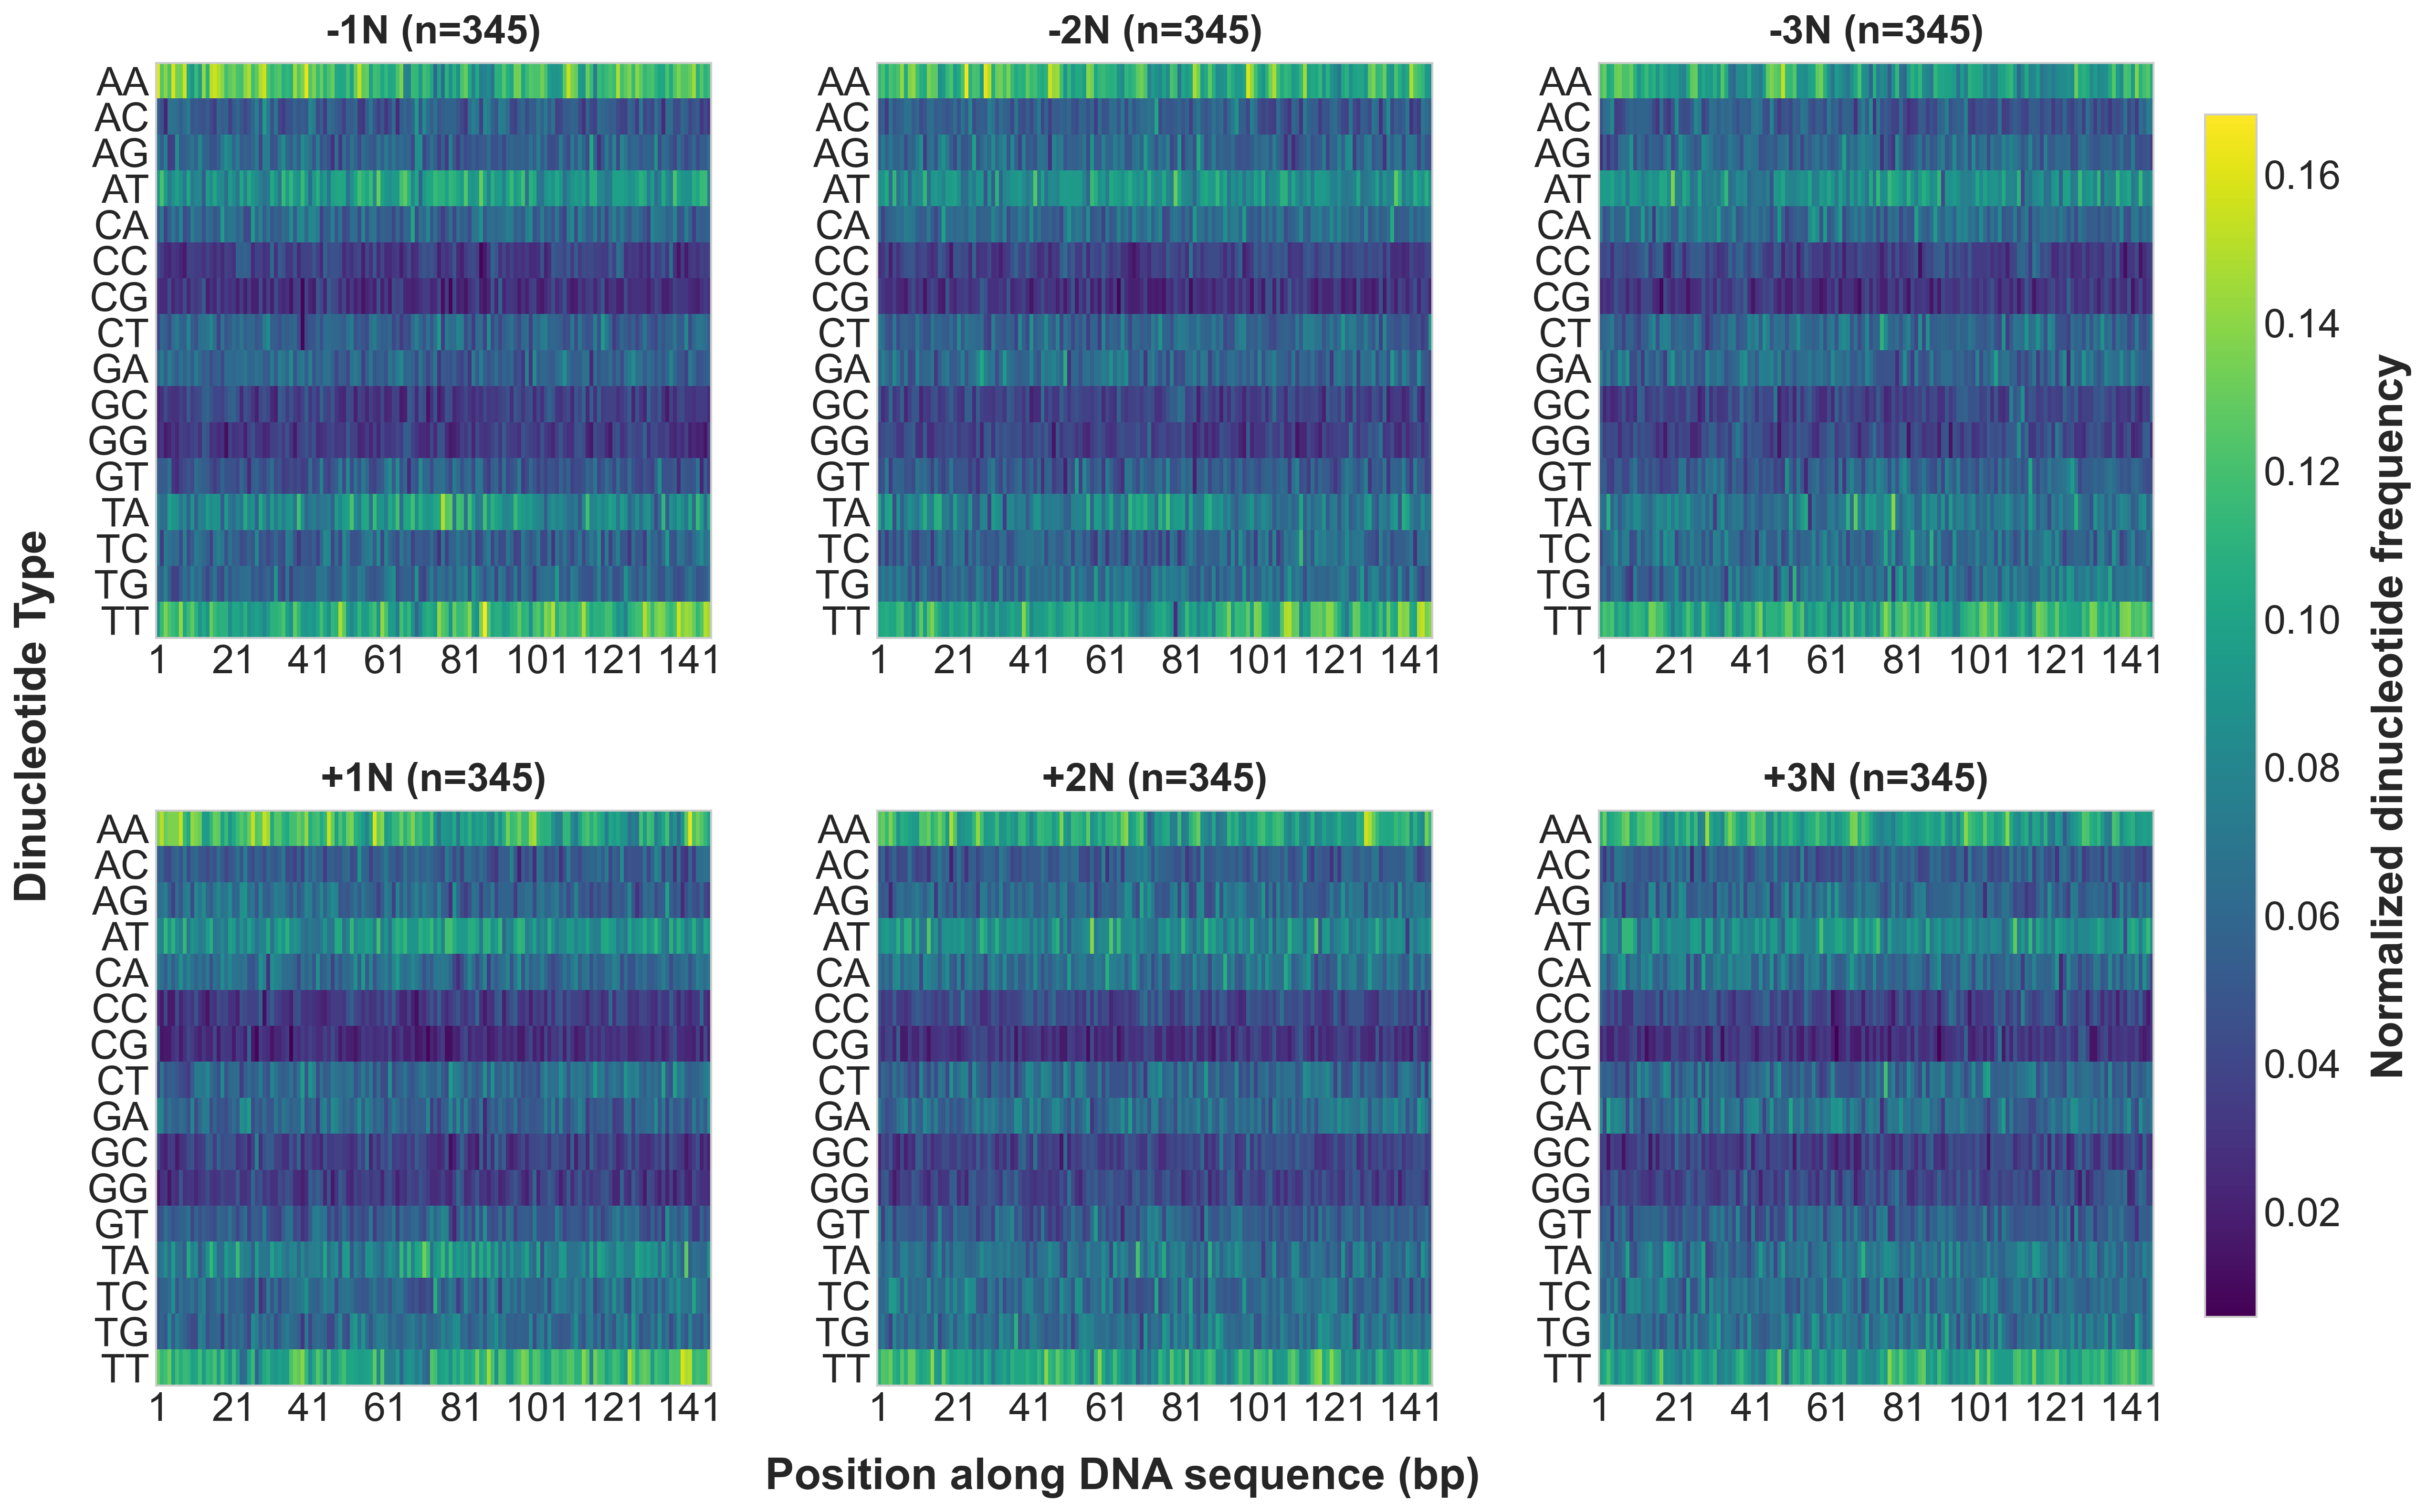

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting parameters
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 20,  
    'axes.titlesize': 20,  
    'axes.labelsize': 20, 
    'xtick.labelsize': 20,  
    'ytick.labelsize': 20,  
    'legend.fontsize': 20,  
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# Data loading and processing
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        matrices = f['Nuar'][:]
    return matrices

# List of file paths
file_paths = [
    "TSS-TTS Matrix/-1N.h5",
    "TSS-TTS Matrix/-2N.h5",
    "TSS-TTS Matrix/-3N.h5",
    "TSS-TTS Matrix/+1N.h5",
    "TSS-TTS Matrix/+2N.h5",
    "TSS-TTS Matrix/+3N.h5"]

# Load data from all files
matrices_list = [load_h5_data(file_path) for file_path in file_paths]

# Calculate the average matrix for each file
average_matrices = [np.mean(matrices, axis=0) for matrices in matrices_list]

# Visualization and saving
dinucleotides = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
                 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
positions = np.arange(1, 147)

# Create a 2x3 subplot layout
fig, axs = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})  

vmin = min([mat.min() for mat in average_matrices])
vmax = max([mat.max() for mat in average_matrices])

# Title list
titles = ['-1N', '-2N', '-3N', '+1N', '+2N', '+3N']

# Plot heatmaps
for i, ax in enumerate(axs.flat):
    im = ax.imshow(average_matrices[i], cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    
    # Set x-axis ticks to appear every 20 positions
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(positions[::20])  
    
    ax.set_yticks(range(16))
    ax.set_yticklabels(dinucleotides)
    ax.set_title(f"{titles[i]} (n={matrices_list[i].shape[0]})", fontweight='bold', pad=10)
    ax.grid(False)

# Add a color bar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Normalized dinucleotide frequency', fontweight='bold', labelpad=15, fontsize=22) 

# Set shared axis labels
fig.text(0.5, 0.05, "Position along DNA sequence (bp)", fontweight='bold', ha='center', fontsize=22) 
fig.text(0.07, 0.5, "Dinucleotide Type", fontweight='bold', va='center', rotation='vertical', fontsize=22)  

# Save the image
plt.savefig("Visualization Charts/dinucleotide_heatmap_+-1N_+-2N_+-3N.png", format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

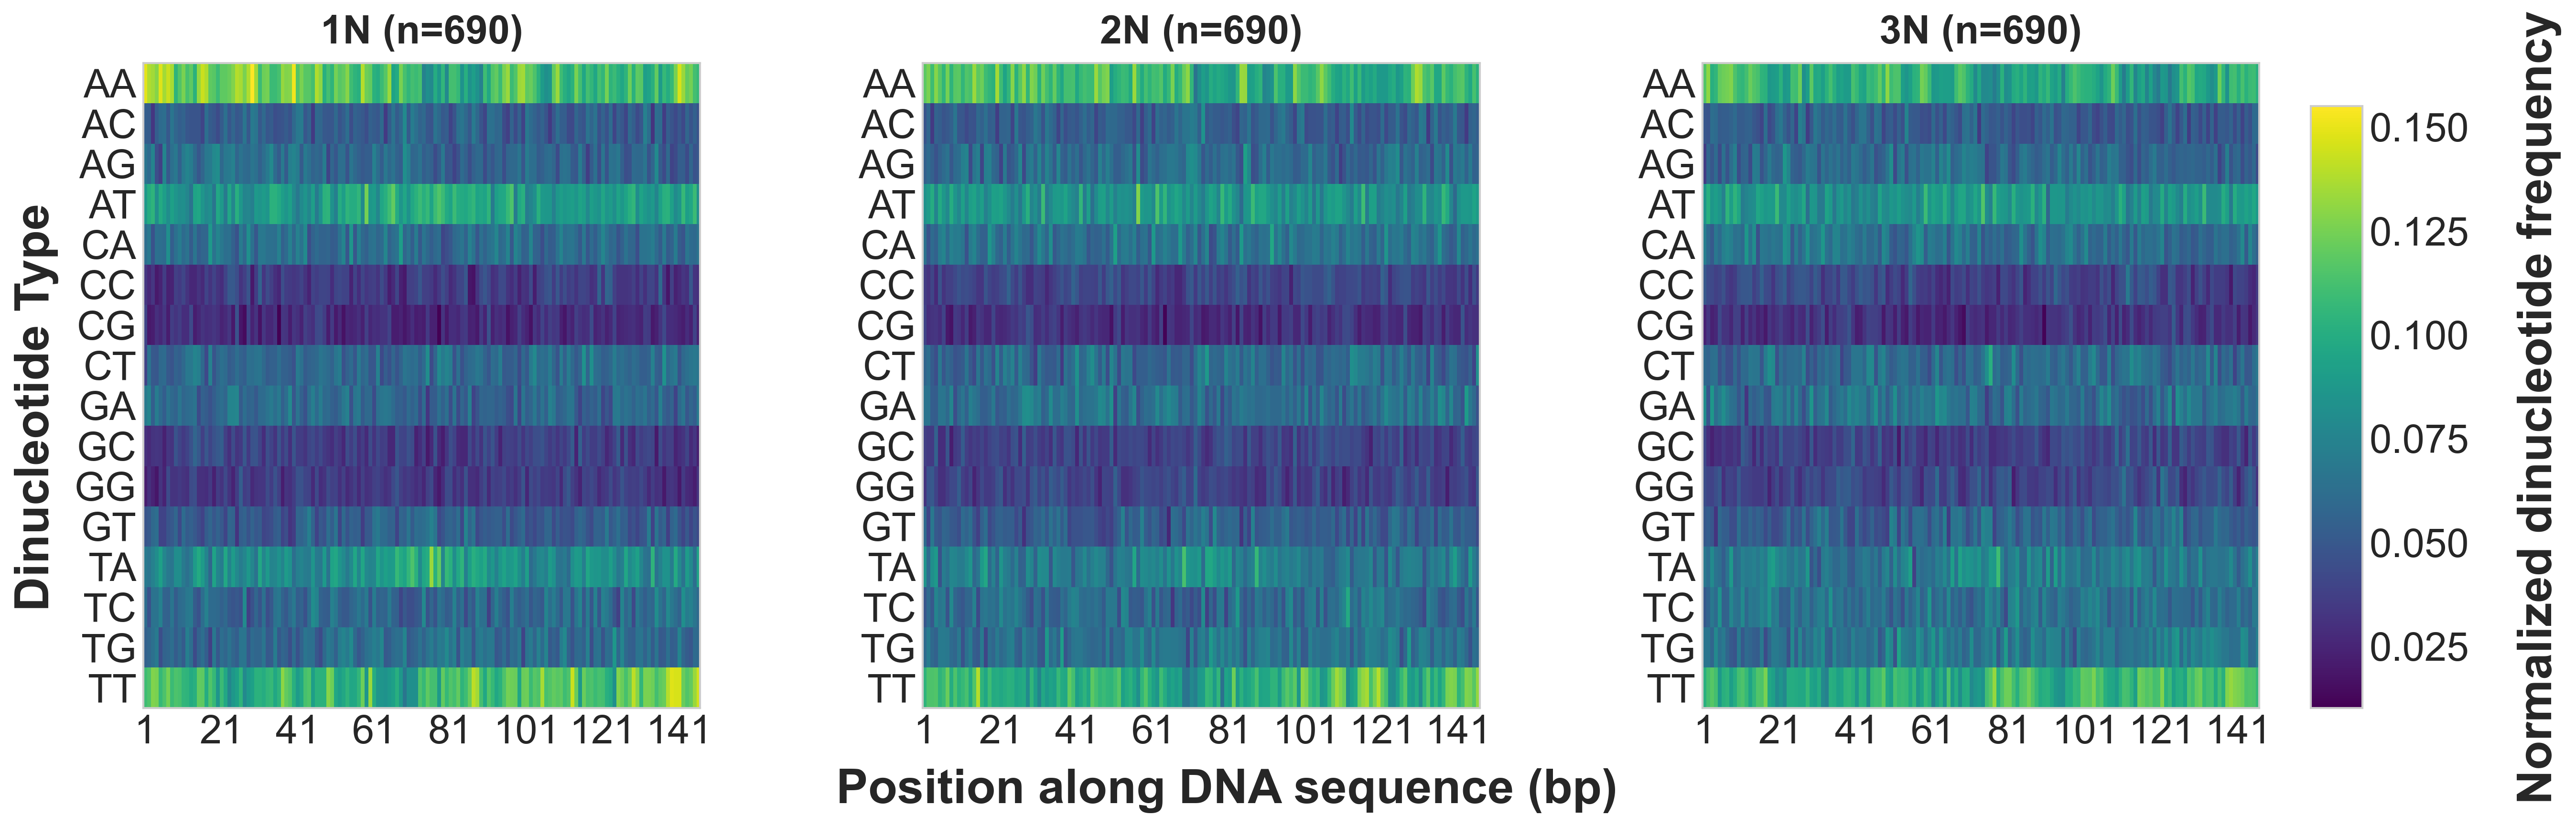

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting parameters
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'font.size': 20,  
    'axes.titlesize': 20,  
    'axes.labelsize': 20,  
    'xtick.labelsize': 20,  
    'ytick.labelsize': 20, 
    'legend.fontsize': 20,  
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1})

# Data loading and processing
def load_h5_data(file_path):
    with h5py.File(file_path, 'r') as f:
        matrices = f['Nuar'][:]
    return matrices

# List of file paths
file_paths = [
    "TSS-TTS Matrix/1N.h5",
    "TSS-TTS Matrix/2N.h5",
    "TSS-TTS Matrix/3N.h5"]

# Load data from all files
matrices_list = [load_h5_data(file_path) for file_path in file_paths]

# Calculate the average matrix for each file
average_matrices = [np.mean(matrices, axis=0) for matrices in matrices_list]

# Visualization and saving
dinucleotides = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
                 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
positions = np.arange(1, 147)

# Create a 1x3 subplot layout
fig = plt.figure(figsize=(18, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.4)

# Title list
titles = ['1N', '2N', '3N']

# Plot heatmaps
vmin = min([mat.min() for mat in average_matrices])
vmax = max([mat.max() for mat in average_matrices])

axes = []
for i in range(3):
    ax = fig.add_subplot(gs[0, i])
    im = ax.imshow(average_matrices[i], cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    
    # Set x-axis ticks to appear every 20 positions
    ax.set_xticks(np.arange(0, 146, 20))
    ax.set_xticklabels(positions[::20])  
    
    ax.set_yticks(range(16))
    ax.set_yticklabels(dinucleotides)
    ax.set_title(f"{titles[i]} (n={matrices_list[i].shape[0]})", fontweight='bold', pad=10)
    ax.grid(False)
    axes.append(ax)

# Add a shared color bar and set color bar label font size
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Normalized dinucleotide frequency', fontsize=24, fontweight='bold', labelpad=24)

# Set shared axis labels
fig.text(0.5, 0.04, "Position along DNA sequence (bp)", fontweight='bold', ha='center', fontsize=24)
fig.text(0.03, 0.5, "Dinucleotide Type", fontweight='bold', va='center', rotation='vertical', fontsize=24)

# Adjust subplot positions to avoid overlap with the color bar
plt.subplots_adjust(left=0.08, right=0.9, bottom=0.15, top=0.9)

# Save the image
plt.savefig("Visualization Charts/dinucleotide_heatmap_1N_2N_3N.png", format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()